In [1]:
import numpy as np
from pathlib import Path
from astropy import stats
from astropy import units as u
from astropy.modeling import models, fitting

import warnings
from astropy.utils.exceptions import AstropyDeprecationWarning
warnings.simplefilter('ignore', category=AstropyDeprecationWarning)

from keckdata import KeckData, KeckDataList, fits_reader, analysis

2019-11-06 11:51:19     INFO: Determining read noise
2019-11-06 11:51:19     INFO:   Checking that all inputs are BIAS frames
2019-11-06 11:51:19     INFO:   Found 16 biases
2019-11-06 11:51:19     INFO: Making master bias from 15 frames
2019-11-06 11:51:19     INFO: Making master bias for each of 1 extensions
2019-11-06 11:51:35     INFO:   Done
2019-11-06 11:51:36     INFO:   Determining read noise for each of 1 extensions
2019-11-06 11:51:38     INFO:   Read Noise is 10.30 adu for extension 1
2019-11-06 11:51:38     INFO:   Generating plot for: m191029_0033.fits, frame 0
2019-11-06 11:51:39     INFO:   Generating read noise plot: read_noise_MOSFIRE_CDS_ext0.png
2019-11-06 11:51:42     INFO: Determining read noise
2019-11-06 11:51:42     INFO:   Checking that all inputs are BIAS frames
2019-11-06 11:51:42     INFO:   Found 12 biases
2019-11-06 11:51:42     INFO: Making master bias from 11 frames
2019-11-06 11:51:42     INFO: Making master bias for each of 1 extensions


Read Noise (ext 0) = 22.14 electron


2019-11-06 11:51:55     INFO:   Done
2019-11-06 11:51:56     INFO:   Determining read noise for each of 1 extensions
2019-11-06 11:51:58     INFO:   Read Noise is 2.84 adu for extension 1
2019-11-06 11:51:58     INFO:   Generating plot for: m191029_0133.fits, frame 0
2019-11-06 11:52:00     INFO:   Generating read noise plot: read_noise_MOSFIRE_MCDS16_ext0.png


Read Noise (ext 0) = 6.11 electron


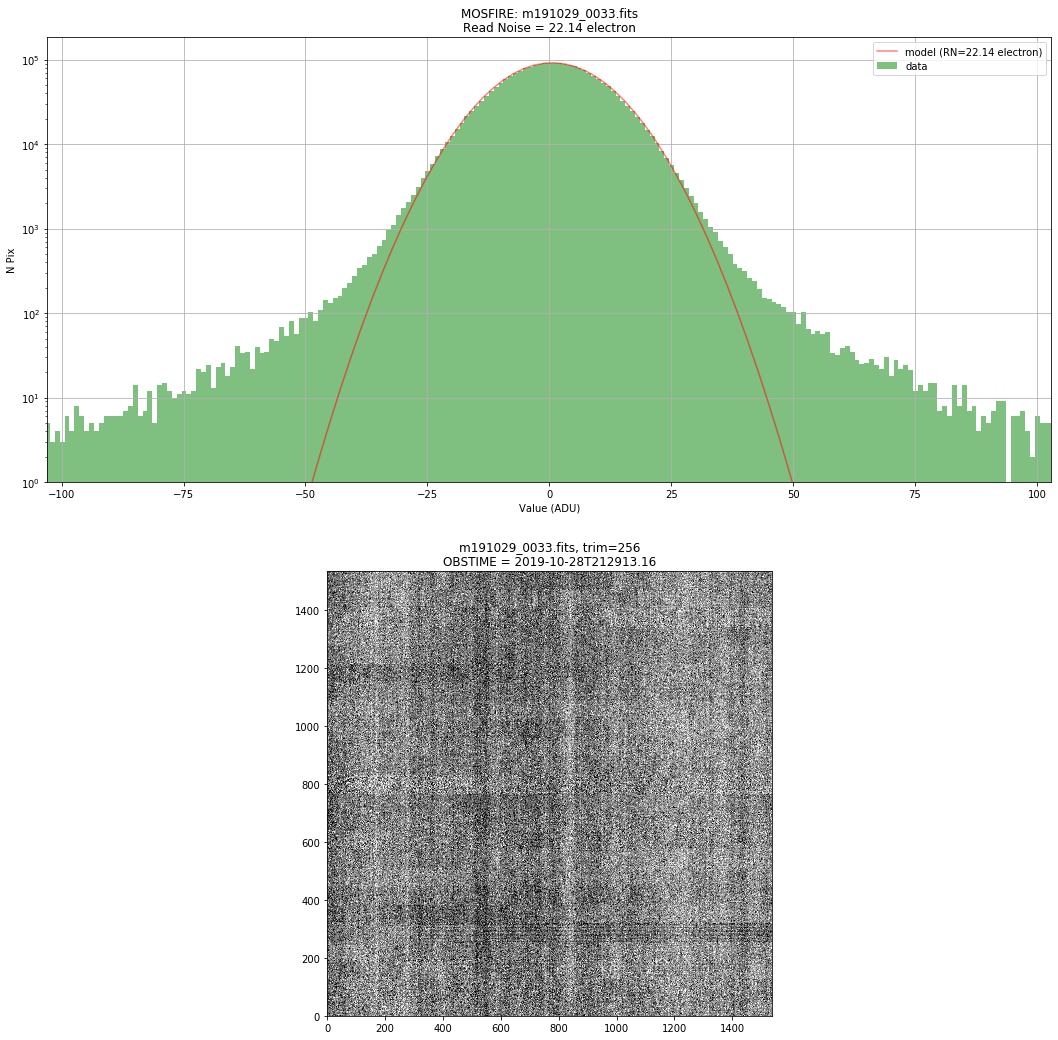

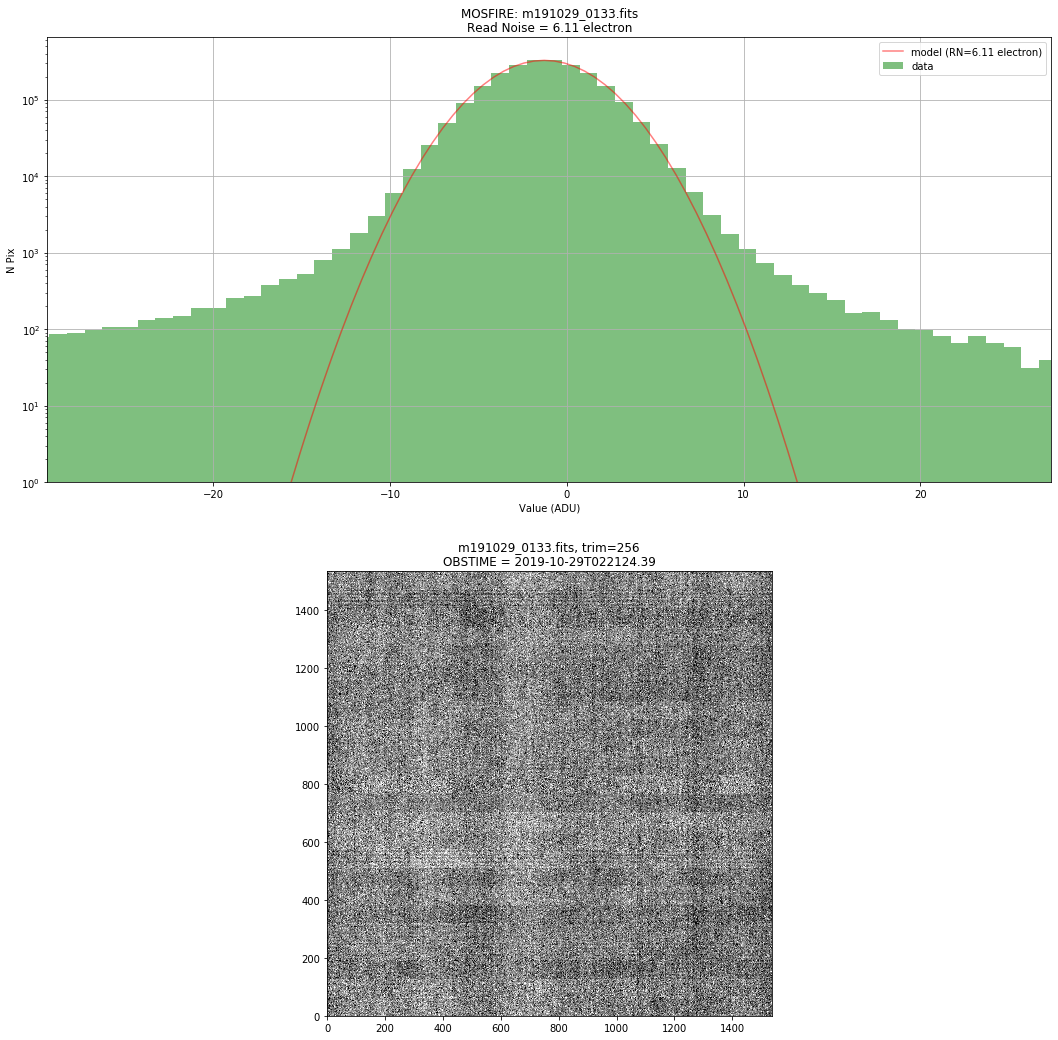

In [2]:
## MOSFIRE

nominal_gain = 2.15 * u.electron/u.adu
p_darks = Path('/Volumes/JOSHW/MOSFIRE_Darks/2019oct29')
files = sorted([f for f in p_darks.glob('m*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)

# CDS Mode
kdl_cds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'CDS'] )

RNcds = analysis.determine_read_noise(kdl_cds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNcds):
    print(f"Read Noise CDS (ext {i}) = {r:.2f}")
del(kdl_cds)

# MCDS Mode
kdl_mcds16 = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'MCDS16'] )

RNmcds = analysis.determine_read_noise(kdl_mcds16, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNmcds):
    print(f"Read Noise MCDS16 (ext {i}) = {r:.2f}")
del(kdl_mcds16)